<img src=".\img\mioti.png">   
<br />
<center style="color:#888">Proyecto Reconocimiento Facial <br/></center>

# Proyecto Reconocimiento Facial: Preprocesamiento Emoción Bored

<img src="./img/emociones.png" style="width: 800px">

# Objetivo

El objetivo es generar una emoción nueva, **Bored**, a partir de una serie de imagenes de personas recopiladas en internet con la expresión de aburrido (bostecos, cansado, cabeza recostada ...) e incluirla como una emoción adicional al dataset FER2013. Las imagenes serám transformadas en imagenes en **escala de grises** y con un tamaño de **48x48** y se marcaran con label **7**. Nos apoyamos en el modelo preentrenado de Opencv Haarcascade para capturar los rostros.

# Prepación del entorno

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
 set working directory
import os
os.chdir("//content/drive/My Drive/MIOTI/PRY/")

# Check current working directory.
retval = os.getcwd()
print ("Current working directory %s" % retval)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
import csv
import random

# Generación del nuevo Dataset FER2013_MIOTI.

* A partir de una serie de imágenes obtenidas por distintos bancos de imagenes que hay en internet, con la expresion Bored, se generara una nuevo dataset con una nueva emoción Bored, y se completara con esta nueva eoción el dataset FER2013.

### Nueva emoción Bored

In [4]:
# Función que escribe la imagen/o imagenes en un fichero csv, con el mismo formtato que FER2013.csv
def write_face_to_csv(list_images,num_images,file='./data/bored.csv'):
    
    list_images_writed=list_images
    if num_images==0:   
        header=[["emotion","pixels","Usage"]]
        list_images_writed=header+list_images_writed

    with open(file,'a', newline='\n') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerows(list_images_writed)      

In [7]:
#Función que carga un csv y lo pasa a un DataFrame.

def load_data(path='./Data/fer2013.csv'):
    fer2013 = pd.read_csv(path)
    emotion_mapping = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral', 7:'Bored'}

    return fer2013, emotion_mapping

In [ ]:
#Cargamos el modelo Haarcascade de OpenCV sobre el que nos apoyaremos para capturar los rostros de las imagenes.
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [5]:
"""Función que orquesta el procesado de la imagen original, captura el o los rostros que hay en ella, y los transforma en una 
imagen de salida por cada rostro que detecta. El formato de estas imagenes ya es de 48x48 en escala de grises.
Las imagenes se guardaran fisicamente en un sibdirectrio 'prepro' dentro del path que se pasa por parámetro
También se genera un csv. bored.csv donde se guardan las imagenes con sus pixeles y el código de emoción y el uso que se
va a dar a esa imagen, si es para test, train, o val, de la misma forma que FER2013.csv """

def face_detector(img,folder,index):
    
   
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.32, 5)
    
    if len(faces) == 0:
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    num_face_detected=0
    
   
    lines=[]
    
    for idx,face in enumerate(faces):
        line=[]
        x,y,w,h = face
    
        # Capturamos el area de interes o ROI
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_CUBIC)
        #Procesamos el ROI
        if np.sum([roi_gray]) != 0.0:
            
            roi = roi_gray.astype("uint8")# / 255.0
            roi = img_to_array(roi)
            roi = roi.flatten().astype('uint8')


            line.append('7') # Emocion bored
            pixels = ' '.join(map(str,roi)) #' '.join(map(str, a))
            line.append(pixels)
            line.append('PublicTest')
            lines.append(line)
           
#             print(folder+'prepro')
            #Las imagenes generadas las guardamos en el directorio prepro.
            cv2.imwrite(folder+'prepro''/rostro_{}_{}.jpg'.format(index,num_face_detected),roi_gray)
            num_face_detected+=1
    
    #Guardamos las imagenes de rostros generadas en un csv.
    
    write_face_to_csv(lines,index)    
    return (x,w,y,h), roi_gray, img


In [89]:
"""Función que lee las imagenes originales de un path determinado y se las pasa a la función face_detector,
para que sean procesadas y se generen imagenes 48x48 en escala de grises."""

def load_images_from_folder(folder):
    images = []
    count=´0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            
            _,face,img=face_detector(img,folder,count)
#             cv2.imwrite(person_path+'/rostro_{}.jpg'.format(count),face)
            if (face.sum()!=0):#Hay captura de cara
                images.append(img)          
                count+=1
    return images



./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/bored/prepro
./images/b

(240, 791, 3)

In [ ]:
# Procesamos las imagenes Bored y generamos directorio con las imagenes preprocesadas Bored en formato FER2013,
# así como generamos csv con ellas.
path='./images/bored/'
imagenes=load_images_from_folder(path)
imagenes[0].shape

In [8]:
#Cargamos el csv con las imagenes bored. El formato de este csv es el mismo que FER2013.csv
data2, emotion=load_data('./data/bored.csv')
# data2, emotion=load_data()
data2.head()

,emotion,pixels,Usage
0,7,251 127 47 54 11 25 40 34 93 145 154 167 182 1...,PublicTest
1,7,101 49 35 35 31 65 108 118 135 138 141 155 149...,PublicTest
2,7,213 192 115 97 69 75 89 75 41 61 74 116 140 16...,PublicTest
3,7,235 239 187 181 189 181 190 185 192 204 211 21...,PublicTest
4,7,207 196 183 255 190 172 167 177 181 186 194 19...,PublicTest


In [9]:
data2.shape

(3330, 3)

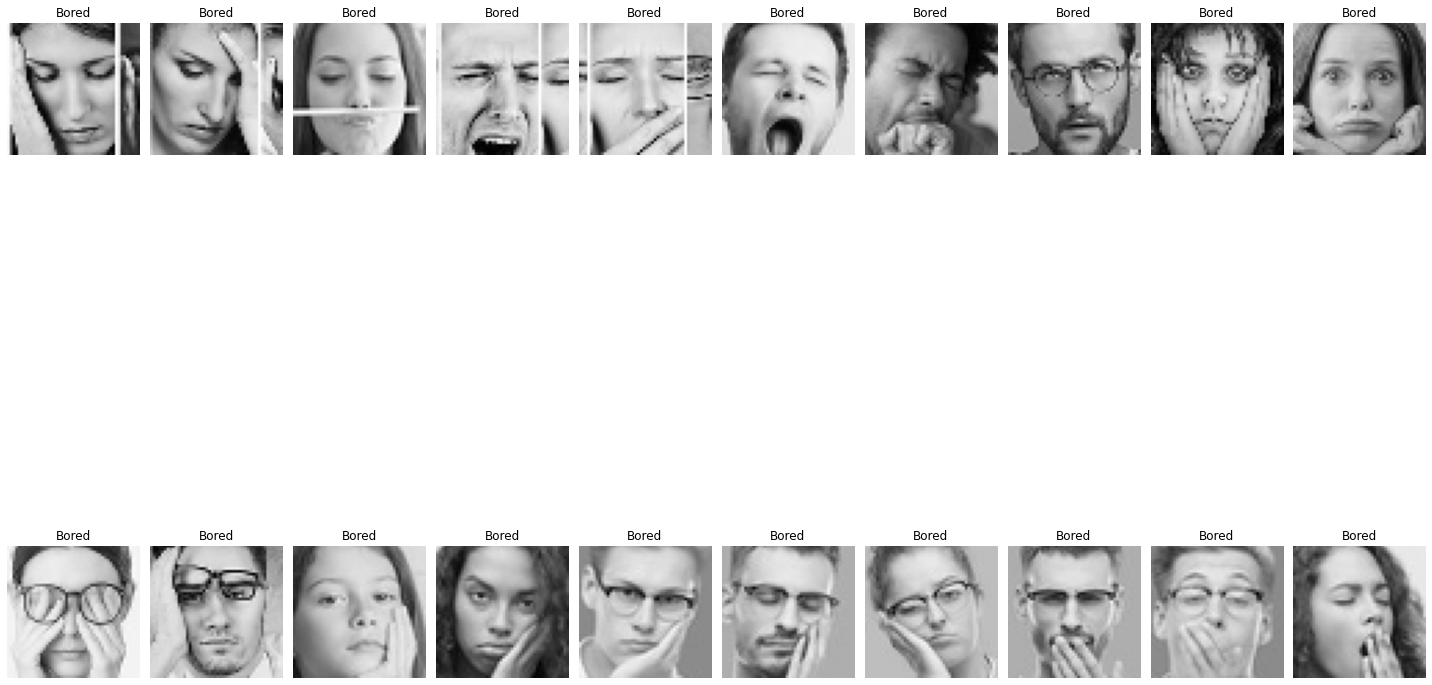

In [47]:
#Visualizamos las imagenes Bored generadas en formato 48x48 escala de grises
#Definimos las filas, columnas y la figura donde vamos a insertar las imágenes
row=2
col=10
axes=[]
fig=plt.figure(figsize=(20,20))
#Recorremos la figura añadiendo en cada recuadro una imagen con su etiqueta
for i in range(row*col):
    
    #Se convierte cada registro de image en un array, se reforma y se pasa a decimal 
    img=np.array(data2.pixels[i].split(' ')).reshape(48, 48).astype('float32')
    #Usamos la librería PIL para convertir el vector en una imagen
    img = Image.fromarray(img) 

    axes.append(fig.add_subplot(row,col,i+1))
    axes[-1].set_title('Bored')
    plt.imshow(img)
    plt.axis("off")
fig.tight_layout()    
plt.show()

In [93]:
""" Función que nos permite partir en una parte de train y test un dataset de entrada.
Se le puede indicar el tamaño de la parte de test que queremos generar, así como que los datos 
estén estratificados"""

def split_data (my_df,test_size=.1):
    
    a_aux_test= np.empty(0)
    a_aux_train= np.empty(0)
    a_aux_val= np.empty(0)
    
    s_Train='Training'
    s_Test= 'PublicTest'
    s_Val='PrivateTest'
    my_df_aux=my_df
    
    my_df_aux.reset_index(inplace=True,drop=True)
    indices = np.array(my_df_aux.index)
    numero_elementos=len(indices)
    print(numero_elementos)
    #Repartimos los indices en la prooporción que nos indica el test_size
    
    a_aux_test = np.append(a_aux_test,indices[:int(numero_elementos*test_size)])
    a_aux_val = np.append(a_aux_val,indices[int(numero_elementos*test_size):int(numero_elementos*test_size)*2])
    a_aux_train = np.append(a_aux_train,indices[int(numero_elementos*test_size)*2:])
  
    #Seleccionamos los dataset de train y test conforme los indices elegidos.
    my_df_aux.loc[a_aux_test,'Usage']='PublicTest' #Test
    my_df_aux.loc[a_aux_val,'Usage']='PrivateTest' #Validation
    my_df_aux.loc[a_aux_train,'Usage']='Training'  #Train
    
            
    return my_df_aux

In [94]:
#Hacemos la partición de las imagenes dejando un 10% para la parte de Test
data3=split_data(data2,0.1)

3330


In [95]:
data3['Usage'].value_counts()

Training       2664
PublicTest      333
PrivateTest     333
Name: Usage, dtype: int64

In [96]:
#Cargamos el dataset FER2013.csv para proceder a incluir la nueva emoción Bored creada.
data_fer,emotion=load_data()
data_fer

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [109]:
#Concatenamos los dataset FER2013 y Bored, para crear el nuevo dataser FER2013_MIOTI
data_fer_mioti= pd.concat([data_fer, data3],ignore_index=True)

In [110]:
#Consultamos el nuevo dataset
data_fer_mioti

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
39212,7,151 150 150 138 136 124 120 99 30 47 77 96 125...,Training
39213,7,144 166 153 157 157 157 158 138 140 159 155 16...,Training
39214,7,25 8 13 23 89 125 163 169 177 182 187 191 195 ...,Training
39215,7,208 207 208 208 38 43 43 49 56 38 47 41 40 41 ...,Training


In [115]:
np.array(data_fer_mioti.index)

array([    0,     1,     2, ..., 39214, 39215, 39216], dtype=int64)

In [117]:
#Barajamos los indices para que la nueva emoción Bored quede repartida por el nuevo dataset de forma aleatoria.
indices = np.array(data_fer_mioti.index)
random.shuffle(indices)
data_fer_mioti=data_fer_mioti.iloc[indices]

In [118]:
data_fer_mioti.tail()

,emotion,pixels,Usage
11542,6,44 32 28 25 17 16 15 15 15 21 28 33 63 85 92 9...,Training
7169,6,202 203 204 207 208 208 208 211 226 148 70 74 ...,Training
30817,4,167 167 165 166 169 169 168 169 172 172 174 17...,PublicTest
3217,3,255 255 255 254 255 252 254 254 192 131 144 18...,Training
22320,1,89 57 25 38 44 46 54 53 59 46 33 34 24 28 41 4...,Training


In [123]:
data_fer_mioti.to_csv('./data/fer2013_mioti.csv',index=False)

In [16]:
data_fer_mioti, emotion=load_data('./data/fer2013_mioti.csv')
data_mioti['Usage'].value_counts()

Training       31373
PrivateTest     3922
PublicTest      3922
Name: Usage, dtype: int64

In [17]:
data_fer_mioti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39217 entries, 0 to 39216
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   39217 non-null  int64 
 1   pixels    39217 non-null  object
 2   Usage     39217 non-null  object
 3   emotions  39217 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [19]:
data_fer_mioti['emotions']=data_fer_mioti['emotion'].map(emotion)

<AxesSubplot:xlabel='emotions'>

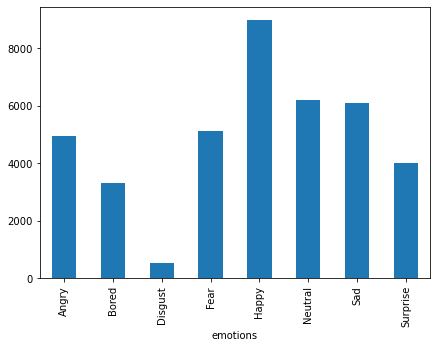

In [45]:
data_fer_mioti.groupby('emotions').emotion.count().plot.bar(figsize=(7,5))